In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../../src/scenes/')
import syndiff as sd 
from ps1_data_handler import ps1_data
from copy import deepcopy
from scipy.ndimage import rotate
import matplotlib.patches as patches
from matplotlib.path import Path

from scipy.optimize import minimize
from astropy.stats import sigma_clipped_stats
from glob import glob
from correct_saturation import saturated_stars, _get_bsc, SkyCoord, image2counts, query_ps1
from astropy.io import fits
from astropy.wcs import WCS
import tessreduce as tr
from PRF import TESS_PRF

from photutils.aperture import CircularAperture, CircularAnnulus,RectangularAperture
from photutils.aperture import ApertureStats, aperture_photometry

from correct_saturation import ps_psf, psf_minimizer, minimize,PS1_to_TESS_mag
from astropy.stats import sigma_clip
from astropy.modeling import models, fitting
import time
import pandas as pd

In [2]:
tess_filename = '../data/tess2019360165923-s0020-1-1-0165-s_ffic.fits'
tess_hdu = fits.open(tess_filename)
tess_wcs = WCS(tess_hdu[1].header)
tess_data = tess_hdu[1].data

In [4]:
cat = pd.read_csv('/Users/rri38/Downloads/syndiff_test_field_rridden.csv')
_tx,_ty = tess_wcs.all_world2pix(cat.raMean,cat.decMean,0)
cat['tessx'] = _tx; cat['tessy'] = _ty
cat = PS1_to_TESS_mag(cat)

sub = cat.loc[(cat.iMeanPSFMag < 17) ]# & (cat.rMeanPSFMag > 12)
#sub = cat.loc[(cat.tmag < 14) & np.isfinite(cat.tmag)  & (cat.rMeanPSFMag > 14)]
ind = ((sub.tessy.values>2) & (sub.tessy.values<tess_data.shape[0]-2) &
       (sub.tessx.values>2) & (sub.tessx.values<tess_data.shape[1]-2))

sub = sub.loc[ind]

subsub = sub.iMeanPSFMag.values >14

<IPython.core.display.Javascript object>


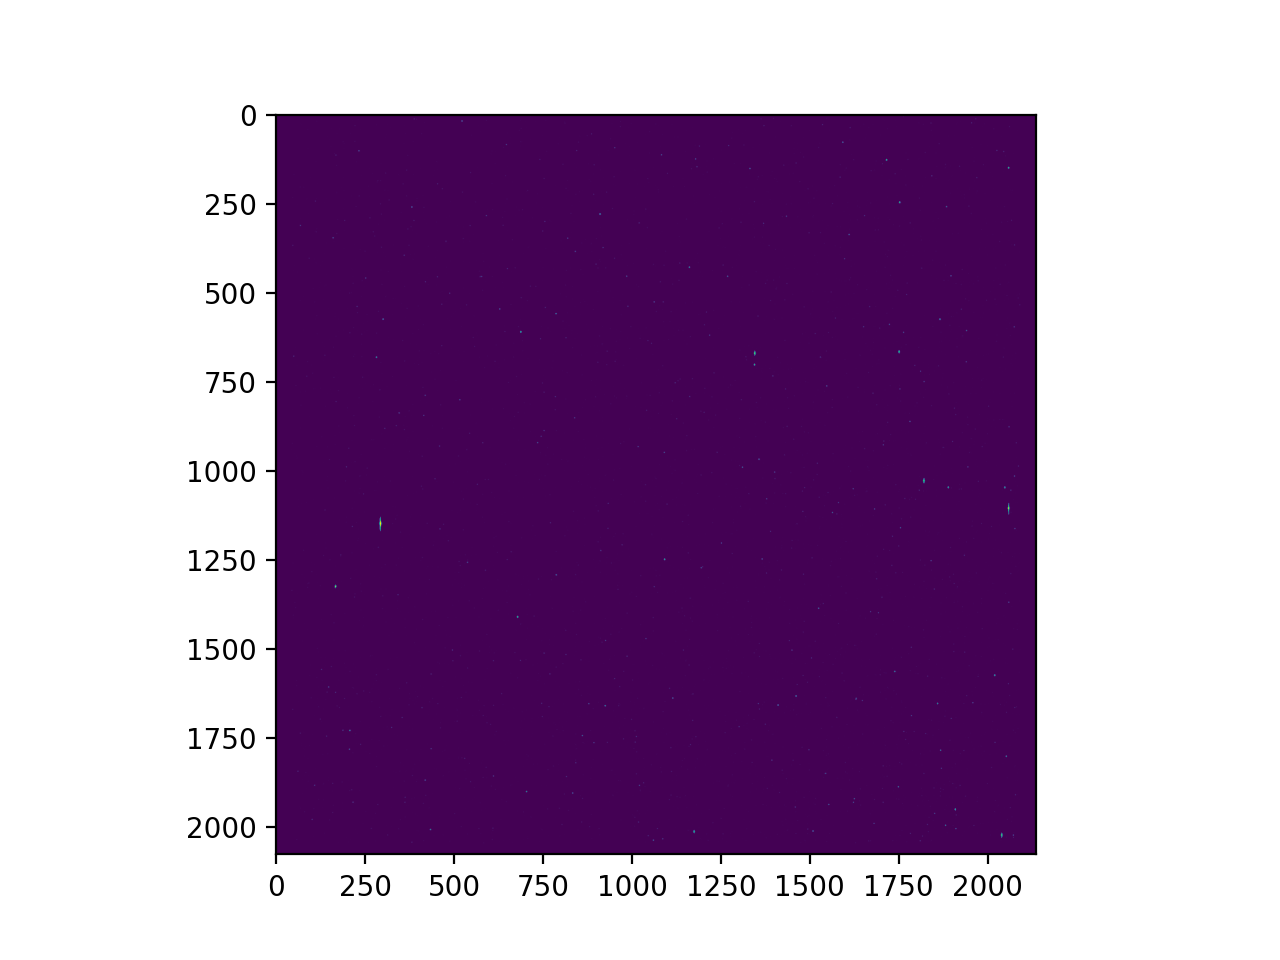

In [5]:
plt.figure()
plt.imshow(tess_data)